# Table of Contents:
1. [Introduction](#section-one)

2. [Meet and greet data - Konnichiwa(こんにちわ)](#section-two)

3. [Analyze the data- Byakugan (白ガン)](#section-three)

4. [Preparing data for consumption- Sonaeru (備える)](#section-four)

5. [Recommendation building phase - Tsukuru (作る)](#section-five)

    

<img src="https://i.pinimg.com/originals/f8/1c/4a/f81c4ab79f3aae7151099ccf7cb7a882.jpg">

<a id="section-one"></a>
# Introduction

#### The notebook follows a boy whose stumbled upon this amazing dataset unintentionally. With the ability of machine learning, he explores the dataset in search of 'what to watch next?' using content based and collaborative filtering.

## Problem statement
#### Every streaming content has its own viewers and each content has it's rating. Viewers leave some good ratings for the content if they like it. But where does it apply? Viewers can spend hours scrolling through hundreds, sometimes thousands of anime's  never finding an content they like. Business need to be provided suggestions based on their likes and needs in order to create a better streaming environment that boosts revenue and increases the time spent on a website.

## [What is a recommendation engine ?](https://towardsdatascience.com/web-scraping-recommender-systems-project-1d360fa678e4)

<img src="https://miro.medium.com/max/757/1*UxsrvB1oWpTYxUgSRNW92g.jpeg">

####  It is an unsupervised learning algorithm (one that does not have a target variable to measure accuracy against) mostly used to aid in consumer decision making. I’m sure you have seen them while online shopping. They also appear in places like streaming apps (aka Netflix and Hulu) to help you select a TV show or movie to watch next and on journalism/media websites like Medium to suggest other articles you may like to read, among many other uses. Obviously many e-retailers like Amazon have already been using recommender algorithms for quite some time, but many smaller or newer sites are still in need. There are different varieties of recommenders that base their predictions on different features.
## About Dataset
#### This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings. 

[Anime Recommendations Database](https://www.kaggle.com/CooperUnion/anime-recommendations-database)

## Project summary

## Objectives of the project
1. Meet and greet data - Konnichiwa  (こんにちわ)
2. Analyze the data- Byakugan (白ガン)
3. Preparing data for consumption- Sonaeru (備える)
4. Recommendation building phase - Tsukuru (作る)

### Import Libraries
#### Let's import all necessary libraries for the analysis and along with it let's bring down our dataset

In [ ]:
## Database Phase
import pandas as pd
import numpy as np

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
anime_data=pd.read_csv('../input/anime-recommendations-database/anime.csv')
rating_data=pd.read_csv('../input/anime-recommendations-database/rating.csv')
## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(anime_data.shape))
print (anime_data.info())

In [ ]:
print ("The shape of the  data is (row, column):"+ str(rating_data.shape))
print (rating_data.info())

## Dataset Details

### 1)anime_data:

* **anime_id** - myanimelist.net's unique id identifying an anime.
* **name** - full name of anime.
* **genre** - comma separated list of genres for this anime.
* **type** - movie, TV, OVA, etc.
* **episodes** - how many episodes in this show. (1 if movie).
* **rating** - average rating out of 10 for this anime.
* **members** - number of community members that are in this anime's "group".

### 2)rating_data:

* **user_id** - non identifiable randomly generated user id.
* **anime_id** - the anime that this user has rated.
* **rating** - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).

## Merging dataframes - Fusion(融合)
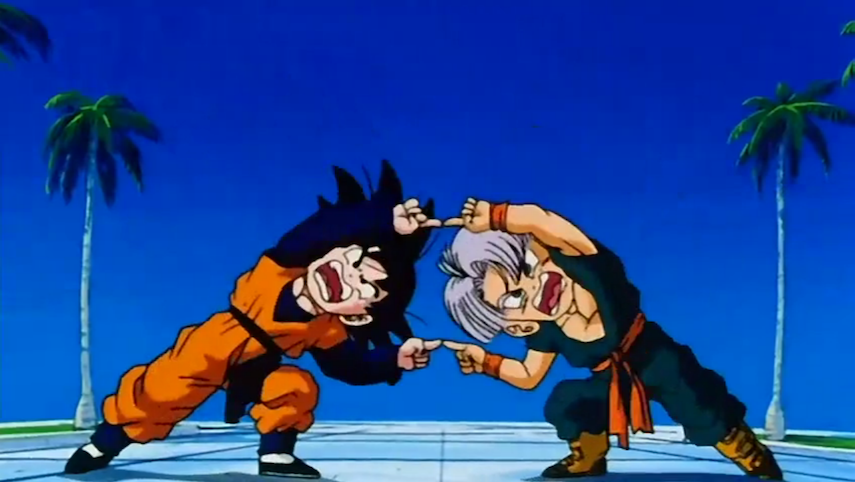

#### In this section we are fusing our csv guests to make the recomenndation engine more powerful. FUSION HA !


In [ ]:
anime_fulldata=pd.merge(anime_data,rating_data,on='anime_id',suffixes= ['', '_user'])
anime_fulldata = anime_fulldata.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})
anime_fulldata.head()


#### We have successfully merged(fused) the csv's and made it powerful. Let's get into action

<img src="https://media.comicbook.com/2020/05/attack-on-titan-final-season-eren-yeager-1222950-1280x0.jpeg">


> ### “I want to see and understand the world outside. I don’t want to die inside these walls without knowing what’s out there.” – Eren Jaeger ( Attack on Titan | Shingeki no Kyojin)

<a id="section-three"></a>
# Analyze the data- Byakugan (白ガン)
<img src="https://giantbomb1.cbsistatic.com/uploads/scale_medium/16/164924/2763709-5436457361-Hinat.jpg">


#### Inorder to build a recommendation engine, we have to understand our dataset. So, let's see an overview of the dataset. BYAKUGAAN !!

## Top 10 Anime based on rating counts
#### I'm sensing the top anime's based on their rating counts provided by the user id's. Let's see who tops the throne

In [ ]:
# Creating a dataframe for rating counts
combine_anime_rating = anime_fulldata.dropna(axis = 0, subset = ['anime_title'])
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['anime_title'])['user_rating'].
     count().reset_index().rename(columns = {'rating': 'totalRatingCount'})
    [['anime_title', 'user_rating']] )


top10_animerating=anime_ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)

**Results:** <br>
* Death Note wears the crown for rating count followed by sword art online and Attack on Titan

In [ ]:
anime_fulldata = anime_fulldata.merge(anime_ratingCount, left_on = 'anime_title', right_on = 'anime_title', how = 'left')
anime_fulldata = anime_fulldata.rename(columns={'user_rating_x': 'user_rating', 'user_rating_y': 'totalratingcount'})

In [ ]:
duplicate_anime=anime_fulldata.copy()
duplicate_anime.drop_duplicates(subset ="anime_title", 
                     keep = 'first', inplace = True)

In [ ]:
top10_animemembers=duplicate_anime[['anime_title', 'members']].sort_values(by = 'members',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="members", data=top10_animemembers, palette="gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on members',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('Community Size', fontsize = 20)

<img src="https://vignette.wikia.nocookie.net/deathnote/images/9/9c/Light_yagami.jpg/revision/latest?cb=20110801092518">


> ### "Look around you, and all you will see are people <br> the world would be better off without."-Light Yagami (Death Note)

**Results:**
* Death note captures the crown again . "I want to tell you **I'M L** "

## Distribution of ratings
#### I'll be now sensing the distribution of ratings on both the datasets. I beleive the rating from anime.csv is from review websites and user_rating in rating.csv is from user id's

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
anime_fulldata['rating'].hist(bins=70)
plt.title("Rating of websites")
plt.subplot(1,2,2)
anime_fulldata['user_rating'].hist(bins=70)
plt.title("Rating of users")

**Insights:**
* Most of the ratings are spread between 6-10
* The mode of the distribution is around 7.5-8.0
* Both the distribution are left skewed
* We have -1 rating as an outlier in rating of users which can be made into NaN

## Medium of streaming 
#### Byakugan ! I'm now seeing from where does this powerul anime's are coming from 

In [ ]:
import plotly.graph_objects as go
labels = anime_fulldata['type'].value_counts().index
values = anime_fulldata['type'].value_counts().values
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title={
        'text': "Medium of Streaming",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

**Insights:**
* 67.6% of the anime's were aired on TV followed by 13.5% through Movie
* 10.2% of anime's are streamed as OVA which is greater than ONA(1.18%)

## Genre Word Cloud
#### Look up, witness the genre cloud !

In [ ]:
#Sharingan copy: https://www.kaggle.com/indralin/try-content-based-and-collaborative-filtering
nonull_anime=anime_fulldata.copy()
nonull_anime.dropna(inplace=True)
from collections import defaultdict

all_genres = defaultdict(int)

for genres in nonull_anime['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1
        
from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

We can sense there are many Comedy genre anime's followd by action, romance,drama in our dataset

<img src="https://ctd-thechristianpost.netdna-ssl.com/en/full/65364/monkey-dluffy.jpg?w=760&h=419&l=50&t=40">

> ### "I’ve set myself to become the King of the Pirates…and if I die trying…then at least I tried!"-Monkey D. Luffy (One Piece)

<a id="section-four"></a>
# Preparing data for consumption- Sonaeru (備える)

#### Before giving our data guests to the recommendation engine we have to fine tune them, sculpt them,train them to face the boss !

### a) Handling NaN values

#### First we have to take care of the NaN values, as this revolves around ratings, a user who hasn't given any ratings has added no value to the engine. So let's drop and crush those NaN values

In [ ]:
anime_feature=anime_fulldata.copy()
anime_feature["user_rating"].replace({-1: np.nan}, inplace=True)
anime_feature.head()

In [ ]:
anime_feature = anime_feature.dropna(axis = 0, how ='any') 
anime_feature.isnull().sum()

### b) Filtering user_id

#### Let's check out the counts of user id and filter based on it

In [ ]:
anime_feature['user_id'].value_counts()

#### There are users who has rated only once, even if they have rated it 5, it can't be considered a valuable record for recommendation. So I have considered minimum 200 ratings by the user as threshold value. You can play around changing the threshold value to get better results, but this worked fine.

In [ ]:
counts = anime_feature['user_id'].value_counts()
anime_feature = anime_feature[anime_feature['user_id'].isin(counts[counts >= 200].index)]

### c) Pivot Dojo

#### This pivot table consists of rows as title and columns as user id, this will help us to create sparse matrix which can be very helpful in finding the cosine similarity ! Don't know what is cosine similarity ? don't worry, We will reveal that in the next section.

In [ ]:
anime_pivot=anime_feature.pivot_table(index='anime_title',columns='user_id',values='user_rating').fillna(0)
anime_pivot.head()

<img src="https://nefariousreviews.files.wordpress.com/2015/04/code-geass-featured.jpg">

> ### “To defeat evil, I shall become an even GREATER evil.” – Lelouch Lamperouge (Code Geass)

<a id="section-five"></a>
# Recommendation building phase - Tsukuru (作る)

## Collaborative Filtering

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/Collaborative_filtering.gif/300px-Collaborative_filtering.gif">

#### Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user.

### Cosine Similarity using KNN


<img src="https://dataconomy.com/wp-content/uploads/2015/04/Five-most-popular-similarity-measures-implementation-in-python-4-620x475.png">


#### Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity.

In [ ]:
from scipy.sparse import csr_matrix

anime_matrix = csr_matrix(anime_pivot.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_matrix)

#### We have fitted the sparse matrix, let's get a random anime title and find recommendation for it. 

In [ ]:
query_index = np.random.choice(anime_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)


#### Here we are returning the distances and indices of 6 neighbours through KNN from the randomly chosen index(anime_title) those will be our recommended anime's

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(anime_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

#### As we see, these are the recommended anmime for . But this code doesn't have much flexibility of our choice. I advise you to check out [Indra Lin's notebook](https://www.kaggle.com/indralin/try-content-based-and-collaborative-filtering) where he had created an awesome function for this collaborative filtering. I used my sharingan eyes to capture two code section from him . LOL

<img src="https://blogs.forbes.com/olliebarder/files/2019/06/one_punch_man_game.jpg">

> ### "Human beings are strong because we have the ability to change ourselves." -Saitama (One Punch Man)

## Content based filtering

<img src="https://miro.medium.com/max/4056/1*yrkvweErbifbPFkBUyZlOw.png">


#### Content-based filtering, also referred to as cognitive filtering, recommends items based on a comparison between the content of the items and a user profile. The content of each item is represented as a set of descriptors or terms, typically the words that occur in a document.A content based recommender works with data that the user provides, either explicitly (rating) or implicitly (clicking on a link). Based on that data, a user profile is generated, which is then used to make suggestions to the user. As the user provides more inputs or takes actions on the recommendations, the engine becomes more and more accurate.

### a) Cleaning anime_title

#### We got many symbols found in anime_title. Let's remove those using this function

In [ ]:
#Sharingan copy:https://www.kaggle.com/indralin/try-content-based-and-collaborative-filtering
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

anime_data['name'] = anime_data['name'].apply(text_cleaning)

#### We have got the title cleaned and neat. Now it's time for the ultimate TFIDF to recommend us the next anime

### b) Term Frequency (TF) and Inverse Document Frequency (IDF)

<img src="https://miro.medium.com/max/3604/1*qQgnyPLDIkUmeZKN2_ZWbQ.png">


#### TF is simply the frequency of a word in a document. IDF is the inverse of the document frequency among the whole corpus of documents. TF-IDF is used mainly because of two reasons: Suppose we search for “the rise of analytics” on Google. It is certain that “the” will occur more frequently than “analytics” but the relative importance of analytics is higher than the search query point of view. In such cases, TF-IDF weighting negates the effect of high frequency words in determining the importance of an item (document).

#### Here we are gonna use it on the genre so that we can recommend the users based on genre content.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
anime_data['genre'] = anime_data['genre'].fillna('')
genres_str = anime_data['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)

In [ ]:
tfv_matrix.shape

#### Scikit-learn already provides pairwise metrics (a.k.a. kernels in machine learning parlance) that work for both dense and sparse representations of vector collections. Here we need to assign 1 for recommended anime and 0 for not recommended anime. So we are using sigmoid kernel

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [ ]:
indices = pd.Series(anime_data.index, index=anime_data['name']).drop_duplicates()

#### We have got the indices for the anime_title, now let's jump onto figure out the recommended anime

<img src="https://static0.cbrimages.com/wordpress/wp-content/uploads/2019/12/Ging-Freecss-Featured-Image.jpg">

> ### “You should enjoy the little detours to the fullest. Because that's where you'll find the things more important than what you want.” - Ging Freecss (HUNTER X HUNTER)

### c) Recommendation function

#### Here we create the function for getting the recommendation for an anime. We turn the similarity scores into lists using enumerate function, sort the list and select the top 10 score for recommendation. 

In [ ]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    anime_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Rating': anime_data['rating'].iloc[anime_indices].values})

#### Let's bring the battle of recommendation !

In [ ]:
give_rec('Naruto: Shippuuden')

In [ ]:
give_rec('Steins;Gate')

In [ ]:
give_rec('Shingeki no Kyojin')

In [ ]:
give_rec('One Piece')

In [ ]:
give_rec('Dragon Ball Z')

<img src="https://static1.cbrimages.com/wordpress/wp-content/uploads/2020/03/goku-2.jpg">

> ### I could go one step farther If I wanted to.” – Goku (Dragon ball z)

### A new kaggle notebook has revealed its face. Is this capable of an upvote?
### Will I post better notebooks ?
### Will I be able to become master ?  

### Find out on the next episode on [Kaggle Notebook Z](https://www.kaggle.com/benroshan/notebooks)